Dataset used : Fake and real news dataset from Kaggle

In [0]:
from google.colab import files
uploaded = files.upload()

Saving Fake.csv to Fake.csv


In [0]:
from google.colab import files
uploaded = files.upload()

Saving True.csv to True.csv


In [0]:
#Import Statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

In [0]:
#Loading True & Fake News Datasets into DataFrames
true_news = pd.read_csv('True.csv')
fake_news = pd.read_csv('Fake.csv')
#Assigning a New Feature 'Truth Value' to both DataFrames
true_news['Truth Value'] = 'True'
fake_news['Truth Value'] = 'Fake'
#Merging both DataFrames
all_news = pd.concat([true_news, fake_news])
all_news.head()
#Checking for Null Values
all_news.isnull().sum()

title          0
text           0
subject        0
date           0
Truth Value    0
dtype: int64

In [0]:
#Removing Punctuation Marks from Text
all_news['text'] = all_news['text'].str.replace('[^\w\s]','')

In [0]:
#Using a Vectorizer to Map words
sw = stopwords.words('english')
vectorizer = TfidfVectorizer(stop_words=sw,lowercase=True)
#Choosing features and value to be classified
truth_value = all_news['Truth Value']
all_news_text = vectorizer.fit_transform(all_news['text'])

In [0]:
#Checking if both columns are equal in size
print(all_news_text.shape)
print(truth_value.shape)

In [0]:
#Splitting the Training & Test sets
all_news_train,all_news_test,truth_value_train,truth_value_test = train_test_split(all_news_text,truth_value,test_size=0.2, random_state= 24)

Text(91.68, 0.5, 'Prediction value')

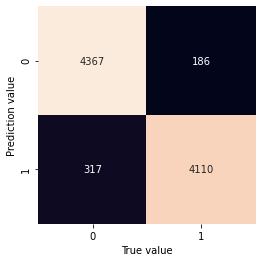

In [0]:
#Naive-Bayes Classifier
NB_classifier = MultinomialNB()
NB_classifier.fit(all_news_train,truth_value_train)
truth_value_prediction = NB_classifier.predict(all_news_test)
#Plotting a Heat-Map
mat = confusion_matrix(truth_value_test, truth_value_prediction)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('True value')
plt.ylabel('Prediction value')

In [0]:
#Printing Classification Report
print(classification_report(truth_value_test, truth_value_prediction))

              precision    recall  f1-score   support

        Fake       0.96      0.93      0.95      4684
        True       0.93      0.96      0.94      4296

    accuracy                           0.94      8980
   macro avg       0.94      0.94      0.94      8980
weighted avg       0.94      0.94      0.94      8980



Text(91.68, 0.5, 'Prediction value')

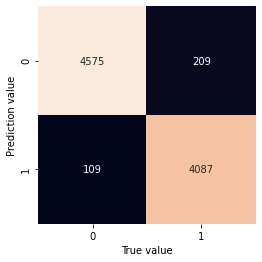

In [0]:
#Random Forest Classifier
rfc=RandomForestClassifier(n_estimators= 10, random_state= 24)
rfc.fit(all_news_train, truth_value_train)
truth_value_predictions = rfc.predict(all_news_test)
#Plotting a Heat-Map
mat = confusion_matrix(truth_value_test, truth_value_predictions)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False) 
plt.xlabel('True value')
plt.ylabel('Prediction value')

In [0]:
#Printing Classification Report
print(classification_report(truth_value_test,truth_value_predictions))

              precision    recall  f1-score   support

        Fake       0.96      0.98      0.97      4684
        True       0.97      0.95      0.96      4296

    accuracy                           0.96      8980
   macro avg       0.97      0.96      0.96      8980
weighted avg       0.96      0.96      0.96      8980



Text(91.68, 0.5, 'Predicted value')

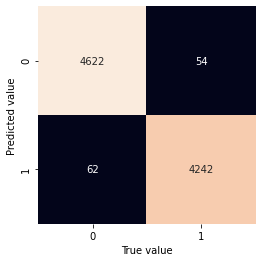

In [0]:
#Logistic Regression Model
model = LogisticRegression(solver='liblinear', C=1.0, random_state = 24)
model.fit(all_news_train, truth_value_train)
truth_value_predict = model.predict(all_news_test)
#Plotting a Heat-Map
mat = confusion_matrix(truth_value_test, truth_value_predict)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False) 
plt.xlabel('True value')
plt.ylabel('Predicted value')

In [0]:
#Printing Classification Report
print(classification_report(y_test,y_model))

              precision    recall  f1-score   support

        Fake       0.99      0.99      0.99      4684
        True       0.99      0.99      0.99      4296

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



Logistic Regression shows the best results with 99% Accuracy

Random Forest shows 96% Accuracy

Naive-Bayes shows 94% Accuracy